# CNNs grpahs

In [1]:
import os
import matplotlib.pyplot as plt
import json
import matplotlib.image as mpimg
import numpy as np

rootdir = './testVGG/'           

In [12]:
def checkJson(json, name=None, initial_lr=None, dropout=None, l2_reg=None, batch_norm=None, data_aug=None):
    if name is not None and json["name_model"]!=name:
        return False
    if initial_lr is not None and json["initial_lr"]!=initial_lr:
        return False
    if dropout is not None and json["dropout"]!=dropout:
        return False
    if l2_reg is not None and json["l2_reg"]!=l2_reg:
        return False
    if batch_norm is not None and json["batch_norm"]!=batch_norm:
        return False
    if data_aug is not None and json["data_aug"]!=data_aug:
        return False
    return True
    
def confidenceInterval(accuracy, n_test):
    return 1.96*np.sqrt(accuracy*(100-accuracy)/n_test)

def getBestValAcc(data):
    try:
        return np.amax(np.array(list(data["train_result"]["val_accuracy"].values())))
    except:
        return -1        

# Plots

In [3]:
for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            if checkJson(data["parameters"], name="VGG19-reg"):
                s = data["parameters"]["name_model"]+" - acc=" +'{:.2f}'.format(getBestValAcc(data)*100)+"\pm"+'{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100,10_000))
                s = s +"  -l2="+'{:.4f}'.format(data["parameters"]["l2_reg"])
                s = s +"  -dropout="+'{:.2f}'.format(data["parameters"]["dropout"])
                print(dir, s)

15_10_35_58 VGG19-reg - acc=69.44\pm0.90  -l2=0.0001  -dropout=0.00
15_11_03_48 VGG19-reg - acc=17.34\pm0.74  -l2=0.0002  -dropout=0.00
15_11_39_42 VGG19-reg - acc=14.26\pm0.69  -l2=0.0005  -dropout=0.00


14_17_15_38 VGG16 - acc=45.96\pm0.98  -lr=0.05  -l2=0.00000  -dropout=0.00
14_17_38_09 VGG16-reg - acc=45.72\pm0.98  -lr=0.05  -l2=0.00001  -dropout=0.00
14_17_54_19 VGG16-reg - acc=47.32\pm0.98  -lr=0.05  -l2=0.00010  -dropout=0.00
14_18_36_39 VGG16-reg - acc=46.68\pm0.98  -lr=0.05  -l2=0.00020  -dropout=0.00
14_19_10_19 VGG16-reg - acc=44.02\pm0.97  -lr=0.05  -l2=0.00050  -dropout=0.00
14_19_20_19 VGG16-reg - acc=44.82\pm0.97  -lr=0.05  -l2=0.00100  -dropout=0.00
15_10_00_48 VGG16-reg - acc=10.20\pm0.59  -lr=0.05  -l2=0.00200  -dropout=0.00
15_10_17_50 VGG16-reg - acc=10.35\pm0.60  -lr=0.05  -l2=0.00500  -dropout=0.00
15_10_35_58 VGG19-reg - acc=69.44\pm0.90  -lr=0.05  -l2=0.00010  -dropout=0.00
15_11_03_48 VGG19-reg - acc=17.34\pm0.74  -lr=0.05  -l2=0.00020  -dropout=0.00
15_11_39_42 VGG19-reg - acc=14.26\pm0.69  -lr=0.05  -l2=0.00050  -dropout=0.00
15_11_49_08 VGG19 - acc=66.28\pm0.93  -lr=0.02  -l2=0.00000  -dropout=0.00
15_12_19_17 VGG16 - acc=56.26\pm0.97  -lr=0.02  -l2=0.00000 

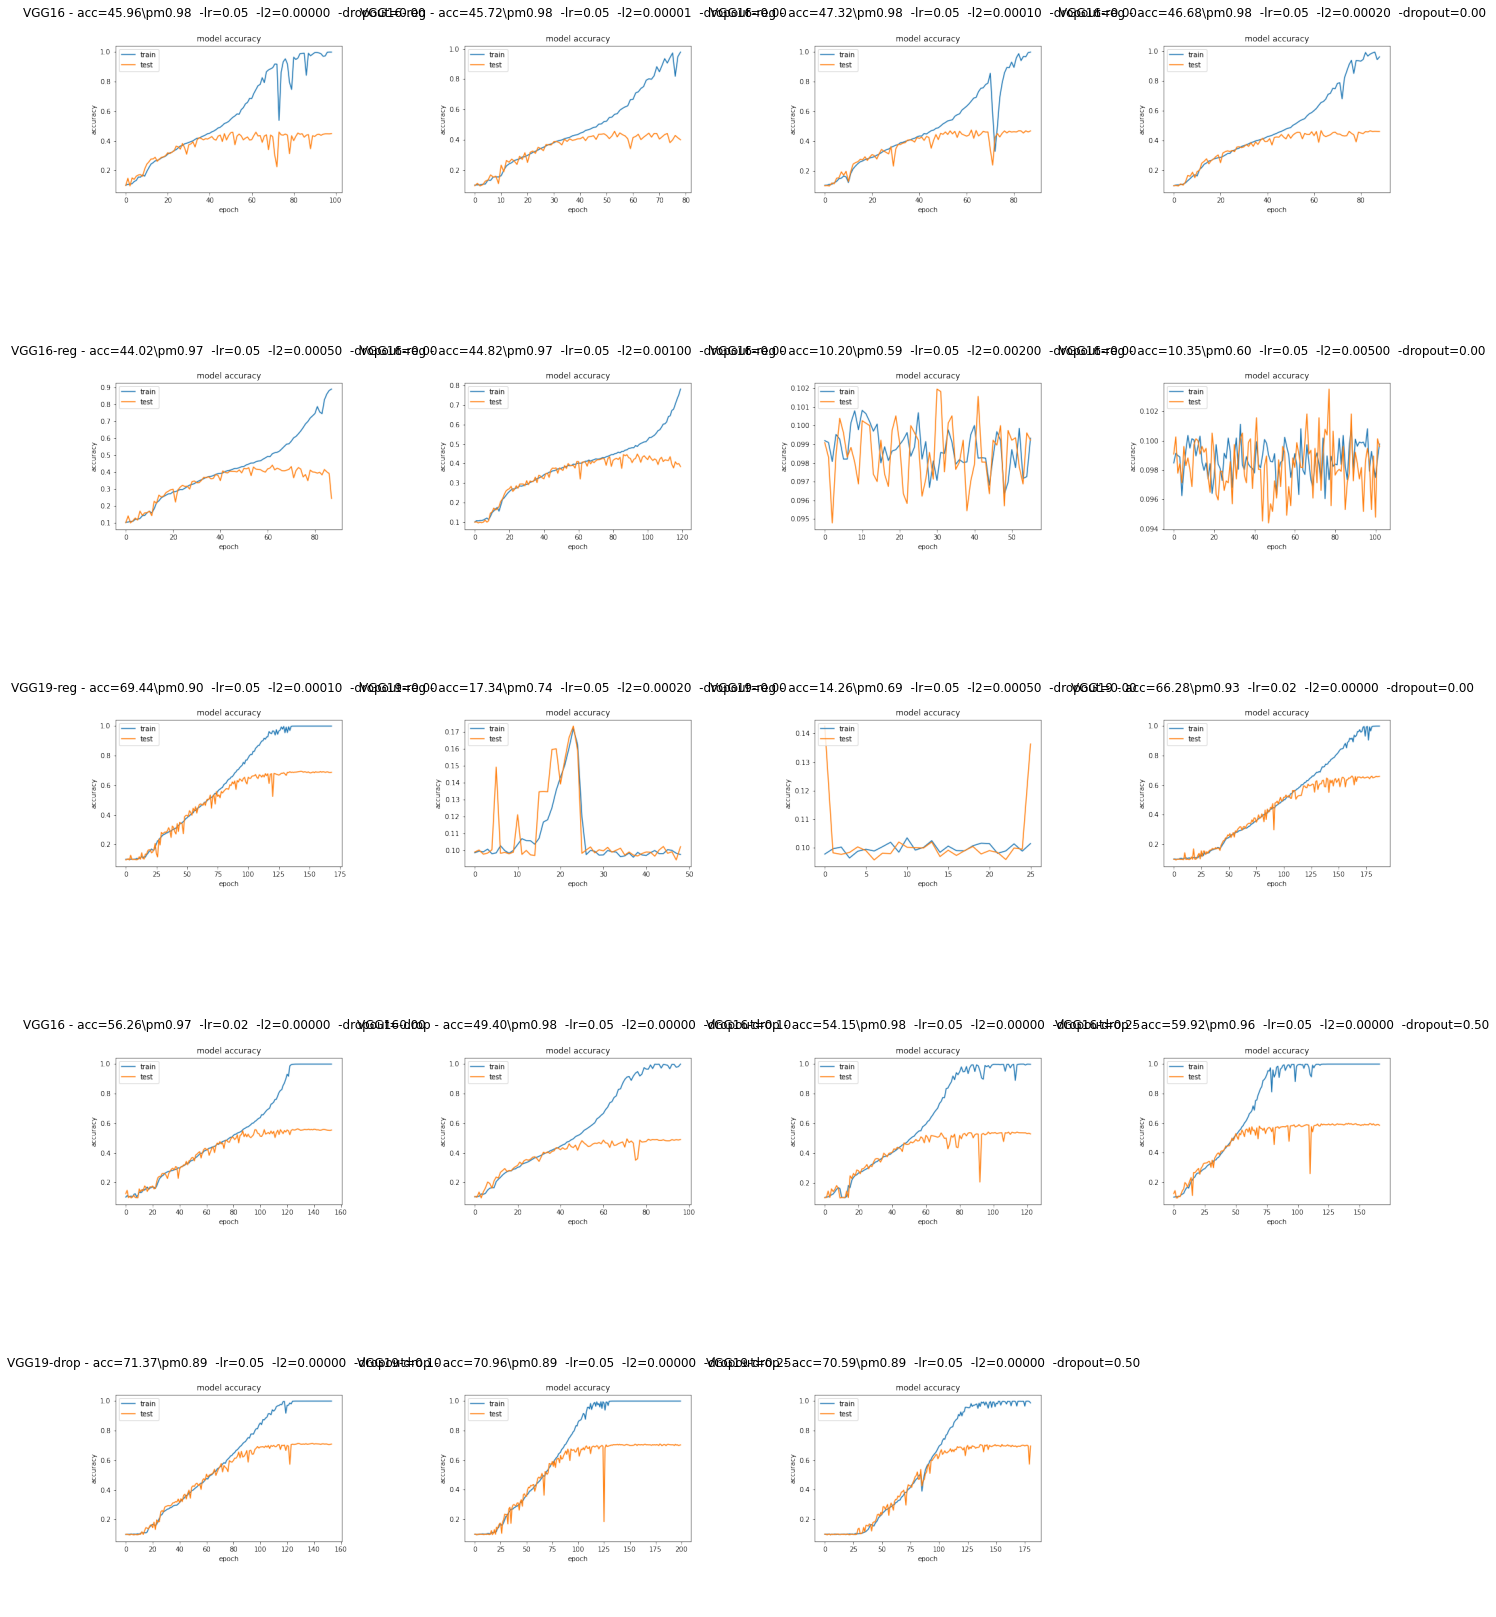

In [4]:
fig, axs = plt.subplots(5, 4,figsize=(24,30))


for ax in axs:
    for a in ax:
        a.set_axis_off()

i= 0
for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            #print(rootdir+dir+"/experiment.json")
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            
            
            s = data["parameters"]["name_model"]+" - acc=" +'{:.2f}'.format(getBestValAcc(data)*100)+"\pm"+'{:.2f}'.format(confidenceInterval(getBestValAcc(data)*100,10_000))
            s = s +"  -lr="+'{:.2f}'.format(data["parameters"]["initial_lr"])
            s = s +"  -l2="+'{:.5f}'.format(data["parameters"]["l2_reg"])
            s = s +"  -dropout="+'{:.2f}'.format(data["parameters"]["dropout"])

            print(dir, s)
            
            img = mpimg.imread(rootdir+dir+"/accuracy.png")
            axs[i//4,i%4].set_title(s)
            axs[i//4,i%4].imshow(img)
            i+=1


14_17_15_38 VGG16 0
14_17_38_09 VGG16-reg 1e-05
14_17_54_19 VGG16-reg 0.0001
14_18_36_39 VGG16-reg 0.0002
14_19_10_19 VGG16-reg 0.0005
14_19_20_19 VGG16-reg 0.001
15_10_00_48 VGG16-reg 0.002
15_10_17_50 VGG16-reg 0.005
15_10_35_58 VGG19-reg 0.0001
15_11_03_48 VGG19-reg 0.0002
15_11_39_42 VGG19-reg 0.0005
15_11_49_08 VGG19 0
15_12_19_17 VGG16 0
15_19_51_37 VGG16-drop 0
15_20_08_43 VGG16-drop 0
15_20_26_02 VGG16-drop 0
15_20_50_41 VGG19-drop 0
15_21_16_56 VGG19-drop 0
15_21_49_17 VGG19-drop 0


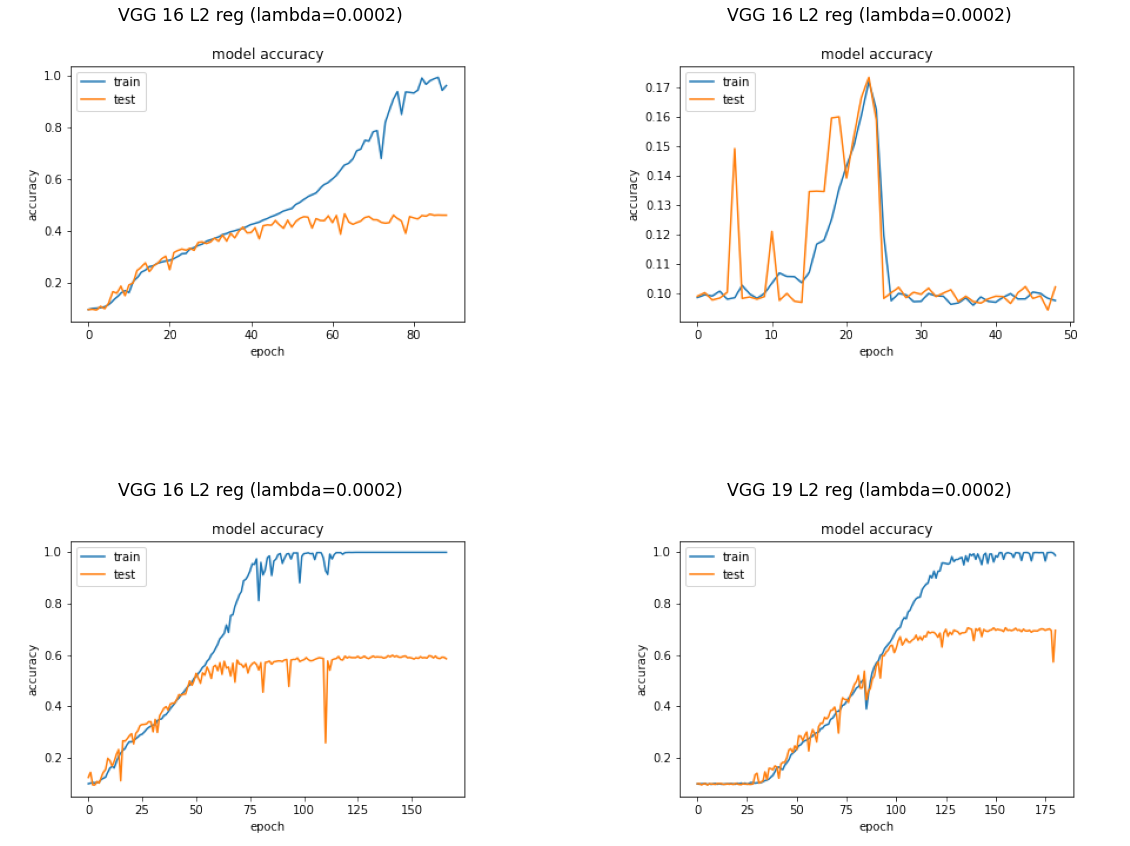

In [21]:
fig, axs = plt.subplots(2, 2,figsize=(20,16))


for ax in axs:
    for a in ax:
        a.set_axis_off()

for subdir, dirs, files in os.walk(rootdir):
    for dir in sorted(dirs):
        if (dir!=".ipynb_checkpoints"):
            f = open(rootdir+dir+"/experiment.json")
            data = json.load(f)
            print(dir,data["parameters"]["name_model"], data["parameters"]["l2_reg"])
            if checkJson(data["parameters"], name="VGG16-reg", l2_reg=0.0002):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,0].set_title("VGG 16 L2 reg (lambda=0.0002)", fontsize="xx-large")
                axs[0,0].imshow(img)
            if checkJson(data["parameters"], name="VGG19-reg", l2_reg=0.0002):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[0,1].set_title("VGG 16 L2 reg (lambda=0.0002)", fontsize="xx-large")
                axs[0,1].imshow(img)
            if checkJson(data["parameters"], name="VGG16-drop", dropout=0.5):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[1,0].set_title("VGG 16 L2 reg (lambda=0.0002)", fontsize="xx-large")
                axs[1,0].imshow(img)
            if checkJson(data["parameters"], name="VGG19-drop", dropout=0.5):
                img = mpimg.imread(rootdir+dir+"/accuracy.png")
                axs[1,1].set_title("VGG 19 L2 reg (lambda=0.0002)", fontsize="xx-large")
                axs[1,1].imshow(img)
